In [53]:
from ananke.models.collection import Collection
from ananke.configurations.collection import HDF5StorageConfiguration
import os
import numpy as np
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

In [90]:
def plot_loghist(x, bins,title='hit distribution'):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')
    plt.xlabel("Photon hits")
    plt.ylabel('no records')
    plt.title(title)

In [66]:
files=[x for x in os.listdir('data/LargeStarting/20records/') if ".h5" in x and len(x)<10]

In [67]:
def counter(file):
    try:
        path=f'data/LargeStarting/20records/{file}'
        config=HDF5StorageConfiguration(data_path=path,read_only=False)
        C=Collection(config)
        with C:
            stats=C.get_record_statistics().df
            records=C.storage.get_hits().df['record_id'].drop_duplicates()
            if len(records)!=20:
                return file,stats,records
        return stats
    except :
        return file

In [68]:
#4000s
result=Parallel(n_jobs=8)(
        delayed(counter)(file) for file in files
)

100%|██████████| 20/20 [00:01<00:00, 13.11it/s]
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|██████████| 20/20 [00:18<00:00,  1.07it/s]


In [69]:
files=[file for file in result if type(file)==tuple or type(file)==str]
len(files)

680

In [51]:
import os

# If file exists, delete it.
def delete(myfile):
    if os.path.isfile(myfile):
        os.remove(myfile)
    else:
        # If it fails, inform the user.
        print("Error: %s file not found" % myfile)

In [82]:
path='data/LargeStarting/20records/'
for file in files:
    if type(file)==str:
        delete(path+file)
    else:
        file=file[0]
        delete(path+file)

In [83]:
dfs=[file for file in result if type(file)!=tuple and type(file)!=str]
len(dfs)

932

In [84]:
def data_extraction(df):
    energy=df['energy']
    hits=df['hit_count']
    return energy,hits

In [85]:

result=Parallel(n_jobs=8, verbose=1)(
        delayed(data_extraction)(df) for df in dfs
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 848 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 932 out of 932 | elapsed:    1.9s finished


In [86]:
energy,hits=zip(*result)

In [87]:
energy=np.concatenate(energy)
hits=np.concatenate(hits)

In [34]:
import matplotlib.pyplot as plt

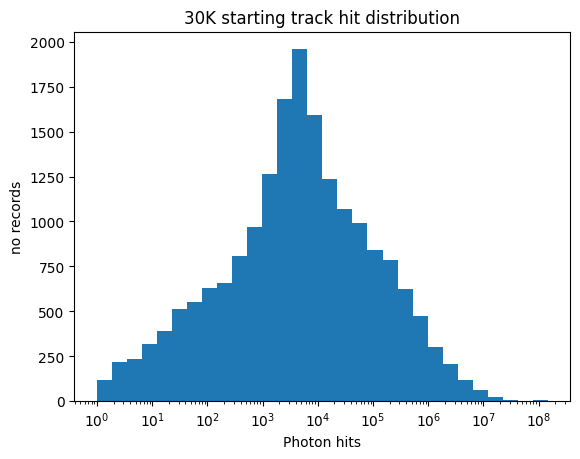

In [91]:
plot_loghist(hits,30,'30K starting track hit distribution')

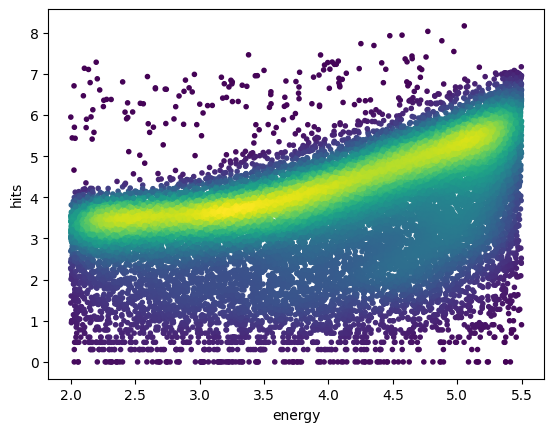

In [89]:
xy = np.vstack([np.log10(energy),np.log10(hits)])
z = gaussian_kde(xy)(xy)
plt.scatter(np.log10(energy),np.log10(hits),c=z, marker='.')
plt.xlabel('energy')
plt.ylabel('hits')
plt.show()

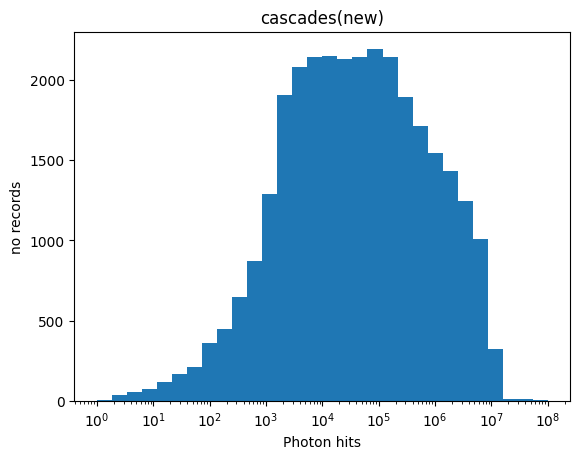

In [65]:
plot_loghist(hits, 30)

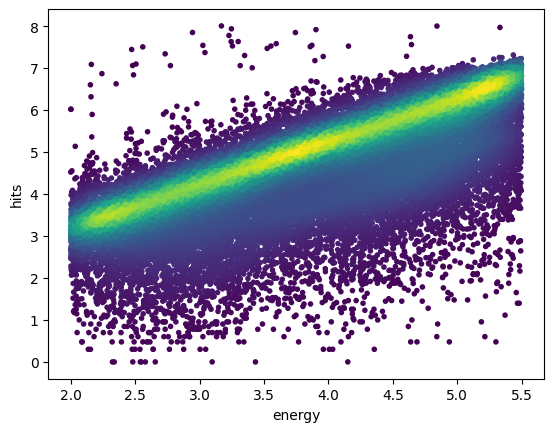

In [64]:
xy = np.vstack([np.log10(energy),np.log10(hits)])
z = gaussian_kde(xy)(xy)
plt.scatter(np.log10(energy),np.log10(hits),c=z, marker='.')
plt.xlabel('energy')
plt.ylabel('hits')
plt.show()

In [43]:
from scipy.stats import gaussian_kde